In [11]:
import requests

In [26]:
url =  'https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount?page=1&perPage=1000&returnType=JSON&cond%5BRESEARCH_DATE%3A%3ALT%5D=202308&cond%5BRESEARCH_DATE%3A%3AGTE%5D=201901&cond%5BREGION_CD%3A%3AEQ%5D=11680&cond%5BDEAL_OBJ%3A%3AEQ%5D=05&serviceKey=IO%2FEdnZ45auz8e6mcFKmXH%2FZDn7lirSzzkWblTjoMfS331%2FhBMrvQ5v3KLTs6yfo1gM4Kdp0kRJaYqcRbkvt5w%3D%3D'

In [4]:
s_key = 'IO/EdnZ45auz8e6mcFKmXH/ZDn7lirSzzkWblTjoMfS331/hBMrvQ5v3KLTs6yfo1gM4Kdp0kRJaYqcRbkvt5w=='

In [27]:
r = requests.get(url)
print(r.url)
print(r.status_code)

https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount?page=1&perPage=1000&returnType=JSON&cond%5BRESEARCH_DATE%3A%3ALT%5D=202308&cond%5BRESEARCH_DATE%3A%3AGTE%5D=201901&cond%5BREGION_CD%3A%3AEQ%5D=11680&cond%5BDEAL_OBJ%3A%3AEQ%5D=05&serviceKey=IO%2FEdnZ45auz8e6mcFKmXH%2FZDn7lirSzzkWblTjoMfS331%2FhBMrvQ5v3KLTs6yfo1gM4Kdp0kRJaYqcRbkvt5w%3D%3D
200


In [32]:
import json

In [34]:
data = json.loads(r.text)

In [55]:
data

{'currentCount': 55,
 'data': [{'ALL_CNT': 478,
   'DEAL_OBJ': '05',
   'LEVEL_NO': '1',
   'REGION_CD': '11680',
   'REGION_NM': '강남구',
   'RESEARCH_DATE': '201905'},
  {'ALL_CNT': 814,
   'DEAL_OBJ': '05',
   'LEVEL_NO': '1',
   'REGION_CD': '11680',
   'REGION_NM': '강남구',
   'RESEARCH_DATE': '201901'},
  {'ALL_CNT': 195,
   'DEAL_OBJ': '05',
   'LEVEL_NO': '1',
   'REGION_CD': '11680',
   'REGION_NM': '강남구',
   'RESEARCH_DATE': '201902'},
  {'ALL_CNT': 380,
   'DEAL_OBJ': '05',
   'LEVEL_NO': '1',
   'REGION_CD': '11680',
   'REGION_NM': '강남구',
   'RESEARCH_DATE': '201903'},
  {'ALL_CNT': 595,
   'DEAL_OBJ': '05',
   'LEVEL_NO': '1',
   'REGION_CD': '11680',
   'REGION_NM': '강남구',
   'RESEARCH_DATE': '201910'},
  {'ALL_CNT': 587,
   'DEAL_OBJ': '05',
   'LEVEL_NO': '1',
   'REGION_CD': '11680',
   'REGION_NM': '강남구',
   'RESEARCH_DATE': '201904'},
  {'ALL_CNT': 498,
   'DEAL_OBJ': '05',
   'LEVEL_NO': '1',
   'REGION_CD': '11680',
   'REGION_NM': '강남구',
   'RESEARCH_DATE': '201906'}

In [60]:
dealsForAPT = []
for i in data['data']:
    region = i['REGION_NM']
    date = i['RESEARCH_DATE']
    deal = i['ALL_CNT']
    dealsForAPT.append({'지역':region, '날짜':date, '거래건수':deal})

In [64]:
import pandas as pd
dealsForAPT_df = pd.DataFrame(dealsForAPT)

In [65]:
dealsForAPT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      55 non-null     object
 1   날짜      55 non-null     object
 2   거래건수    55 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


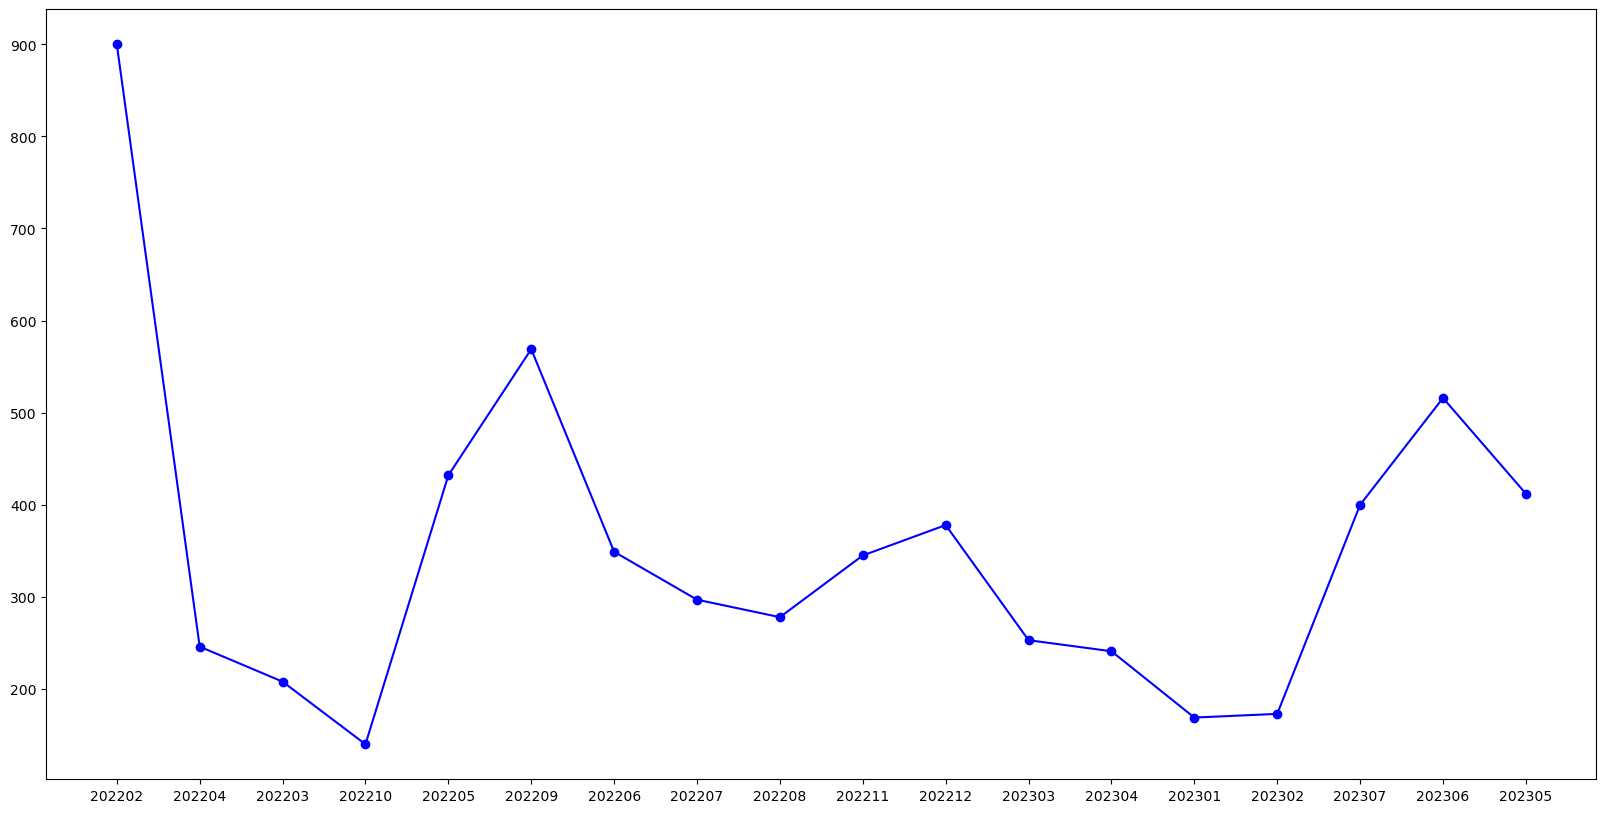

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(part_deals['날짜'], part_deals['거래건수'], color='b', marker='o')
plt.show()

In [88]:
part_deals = dealsForAPT_df[dealsForAPT_df['날짜']>'202201']

In [76]:
part_deals

41    202205
42    202209
43    202206
44    202207
45    202208
46    202211
47    202212
48    202303
49    202304
50    202301
51    202302
52    202307
53    202306
Name: 날짜, dtype: object

In [89]:
part_deals

,지역,날짜,거래건수
29,강남구,202202,900
36,강남구,202204,246
37,강남구,202203,208
40,강남구,202210,140
41,강남구,202205,432
42,강남구,202209,569
43,강남구,202206,349
44,강남구,202207,297
45,강남구,202208,278
46,강남구,202211,345


In [81]:
part_deals_df = pd.DataFrame(part_deals, columns=["날짜"])

* 책에 나온 코드는 오류로 끝남.

In [91]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [105]:
url = "https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount? \
page=1& \
perPage=1000& \
returnType=JSON& \
cond%5BRESEARCH_DATE%3A%3ALT%5D=202308& # 끝 날짜 \
cond%5BRESEARCH_DATE%3A%3AGTE%5D=201901& # 시작 날짜 \
cond%5BREGION_CD%3A%3AEQ%5D=11680& # 지역코드 \
cond%5BDEAL_OBJ%3A%3AEQ%5D=05& # 거래유형 \
serviceKey=IO%2FEdnZ45auz8e6mcFKmXH%2FZDn7lirSzzkWblTjoMfS331%2FhBMrvQ5v3KLTs6yfo1gM4Kdp0kRJaYqcRbkvt5w%3D%3D"

In [93]:
endpoint = "https://api.odcloud.kr/api/RealEstateTradingSvc/v1/getRealEstateTradingCount?" # base URL
page = 1
perPage = 1000
returnType = 'JSON'
startDate = '202305'
endDate = '201901'
region = '11680'
tradingtype='05'
serviceKey = "IO/EdnZ45auz8e6mcFKmXH/ZDn7lirSzzkWblTjoMfS331/hBMrvQ5v3KLTs6yfo1gM4Kdp0kRJaYqcRbkvt5w=="

In [99]:
url = endpoint + "?" + "page=" + page + "&" + "perPage=" + perPage + "&" + "returnType=" + returnType + "&" + "cond[RESEARCH_DATE::LT]=" + startDate + "&" + "cond[RESEARCH_DATE::GTE]=" + endDate + "&" + "cond[REGION_CD::EQ]=" + region + "&" +"cond[DEAL_OBJ::EQ]=" + tradingtype + "&" + "serviceKey=" + serviceKey


TypeError: can only concatenate str (not "int") to str

In [100]:
url = endpoint + "?" \
    "page=" + page + \
    "&" + "perPage=" + perPage + \
    "&" + "returnType=" + returnType + \
    "&" + "cond[RESEARCH_DATE::LT]=" + startDate + \
    "&" + "cond[RESEARCH_DATE::GTE]=" + endDate + \
    "&" + "cond[REGION_CD::EQ]=" + region + \
    "&" +"cond[DEAL_OBJ::EQ]=" + tradingtype + \
    "&" + "serviceKey=" + serviceKey


SyntaxError: unexpected character after line continuation character (1774938673.py, line 8)

In [101]:
url = endpoint + "?" \
    "page=" + page + \
    "&" + "perPage=" + perPage + \
    "&" + "returnType=" + returnType + \
    "&" + "startdate=" + startDate + \
    "&" + "enddate=" + endDate + \
    "&" + "region=" + region + \
    "&" +"tradingtype=" + tradingtype + \
    "&" + "serviceKey=" + serviceKey

TypeError: can only concatenate str (not "int") to str